In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [27]:
df=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/chronickidney.xlsx")

In [28]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
#Reemplace("?" po Nan)
df.replace("?", np.nan, inplace = True)

In [30]:
#Miro % de NANS
for col in df.columns:
    suma_nans=pd.isnull(df[col]).values.ravel().sum()
    print(col,"=",(suma_nans/df.shape[0])*100,"%")

age = 2.25 %
bp = 3.0 %
sg = 11.75 %
al = 11.5 %
su = 12.25 %
rbc = 38.0 %
pc = 16.25 %
pcc = 1.0 %
ba = 1.0 %
bgr = 11.0 %
bu = 4.75 %
sc = 4.25 %
sod = 21.75 %
pot = 22.0 %
hemo = 13.0 %
pcv = 17.75 %
wc = 26.5 %
rc = 32.75 %
htn = 0.5 %
dm = 0.5 %
cad = 0.5 %
appet = 0.25 %
pe = 0.25 %
ane = 0.25 %
class = 0.0 %


In [31]:
#Elimino Nans
df2=df.dropna(axis=0)

In [32]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv       object
wc        object
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [33]:
cols=["wc","pcv"]
df2[cols]=df2[cols].astype("float64")

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [34]:
df2=df2[df2["hemo"]!=9.4]

In [35]:
df2=df2.reset_index(drop=True)

In [36]:
#Divido el df en 2 (num y cat)
lista_numericas = df2._get_numeric_data().columns
df_num = df2[lista_numericas]
df_cat = df2.drop(lista_numericas, axis=1)

In [37]:
#Miro variabilidad en las cols:
for i in df_cat.columns:
    print(df_cat[i].value_counts(normalize=True))
    print('****************************')

normal      0.88535
abnormal    0.11465
Name: rbc, dtype: float64
****************************
normal      0.821656
abnormal    0.178344
Name: pc, dtype: float64
****************************
notpresent    0.917197
present       0.082803
Name: pcc, dtype: float64
****************************
notpresent    0.929936
present       0.070064
Name: ba, dtype: float64
****************************
no     0.789809
yes    0.210191
Name: htn, dtype: float64
****************************
no     0.828025
yes    0.171975
Name: dm, dtype: float64
****************************
no     0.936306
yes    0.063694
Name: cad, dtype: float64
****************************
good    0.878981
poor    0.121019
Name: appet, dtype: float64
****************************
no     0.878981
yes    0.121019
Name: pe, dtype: float64
****************************
no     0.904459
yes    0.095541
Name: ane, dtype: float64
****************************
notckd    0.732484
ckd       0.267516
Name: class, dtype: float64
******************

In [38]:
#Eliminar:
cols=['pcc','ba','cad']
df_cat.drop(cols,axis="columns",inplace=True)

In [39]:
df_cat.columns

Index(['rbc', 'pc', 'htn', 'dm', 'appet', 'pe', 'ane', 'class'], dtype='object')

In [40]:
dummy_rbc = pd.get_dummies(df_cat["rbc"])
dummy_pc= pd.get_dummies(df_cat['pc'])
dummy_htn=pd.get_dummies(df_cat['htn'])
dummy_dm=pd.get_dummies(df_cat['dm'])
dummy_appet=pd.get_dummies(df_cat['appet'])
dummy_pe=pd.get_dummies(df_cat['pe'])
dummy_ane=pd.get_dummies(df_cat['ane'])

In [41]:
df_cat["dum_rbc"]=dummy_rbc["normal"]
df_cat["dum_pc"]=dummy_pc["normal"]
df_cat["dum_htn"]=dummy_htn["yes"]
df_cat["dum_dm"]=dummy_dm["yes"]
df_cat["dum_appet"]=dummy_appet["good"]
df_cat["dum_pe"]=dummy_pe["yes"]
df_cat["dum_ane"]=dummy_ane["yes"]

In [42]:
df_cat=df_cat.reset_index(drop=True)
df_num=df_num.reset_index(drop=True)

In [43]:
#Transformo la col a predecir ('clase'):
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
clase = class_labelEncoding.fit_transform(df_cat['class'].values)

In [44]:
df_num2=df_cat[['dum_pc', 'dum_htn', 'dum_dm', 'dum_appet', 'dum_pe', 'dum_ane']]
df_num3=df_num.join(df_num2)
df_num3

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,dum_pc,dum_htn,dum_dm,dum_appet,dum_pe,dum_ane
0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0,1,0,0,1,1
1,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,0,1,1,0,0,1
2,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,0,1,1,0,1,0
3,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,0,1,1,0,1,0
4,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,0,0,1,0,0
153,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,0,0,1,0,0
154,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,0,0,1,0,0
155,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,0,0,1,0,0


In [109]:
y=clase
X=np.array(df_num3)

In [49]:
df_num3.iloc[:,10][df_num3.iloc[:,10]==9.4]


Series([], Name: hemo, dtype: float64)

In [50]:
df_num2.columns

Index(['dum_pc', 'dum_htn', 'dum_dm', 'dum_appet', 'dum_pe', 'dum_ane'], dtype='object')

# Clasificador knn

## 1. Hold out

In [51]:
#Divido en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (109, 20) (109,)
Test set: (48, 20) (48,)


### Busco el mejor k para hold out:

In [52]:
#Pruebo el mejor k de k-neigthboors
list_accuracy=[]
for i in range(3,50,2):
    clasificador = KNeighborsClassifier(i, algorithm="brute")
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    list_accuracy.append(resultado)
print(list_accuracy)

[0.875, 0.8541666666666666, 0.8541666666666666, 0.8125, 0.8125, 0.8125, 0.7708333333333334, 0.7708333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]


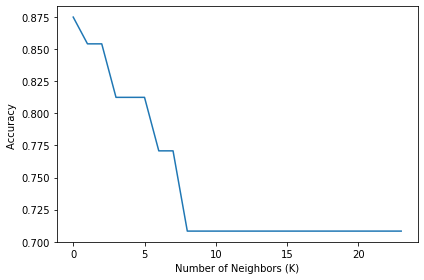

In [53]:
#Ploteo Accuracy vs k
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

### hold out metricas

In [54]:
#Me quedo con el K que de mejor Accuracy
clasificador = KNeighborsClassifier(5, algorithm="brute")
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
resultado = accuracy_score(y_test, yhat)
resultado

0.8541666666666666

In [55]:
print("Jaccard index: " , jaccard_score(y_test, yhat, average="macro"))
print("Exactitud: " , accuracy_score(y_test, yhat))
print("Precisión: ", precision_score(y_test, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test, yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))

Jaccard index:  0.6646341463414633
Exactitud:  0.8541666666666666
Precisión:  0.9146341463414633
Sensibilidad:  0.75
F1-score:  0.7866666666666666


### hold out confussion matrix

In [56]:
#Utilizo y_test e y_hat
confusion_matrix(y_test, yhat, labels=[0,1,2])

array([[ 7,  7,  0],
       [ 0, 34,  0],
       [ 0,  0,  0]])

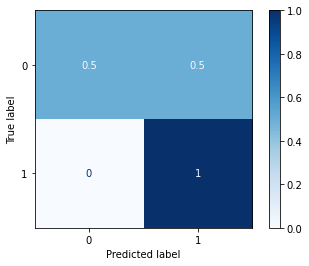

In [57]:
disp = plot_confusion_matrix(clasificador, X_test, y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

### hold out curva ROC

Area bajo la curva:  0.7668067226890756


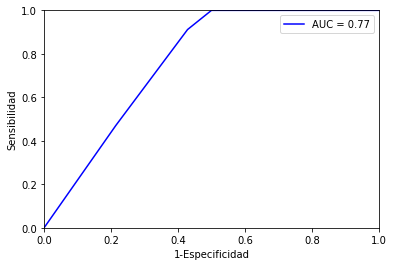

In [58]:
#Utilizo X_test e Y_test
probs = clasificador.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

## 2. Leave one out

### Busco el mejor k para LOO:

In [59]:
#Pruebo el mejor k de k-neigthboors
list_accuracy=[]
for i in range(3,50,2):
    clasificador = KNeighborsClassifier(i, algorithm="brute")
    clasificador.fit(X, y)
    yhat = clasificador.predict(X)
    resultado = accuracy_score(y, yhat)
    list_accuracy.append(resultado)
print(list_accuracy)

[0.8789808917197452, 0.8598726114649682, 0.8343949044585988, 0.8280254777070064, 0.8280254777070064, 0.8280254777070064, 0.821656050955414, 0.802547770700637, 0.802547770700637, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7961783439490446, 0.7515923566878981, 0.732484076433121, 0.732484076433121]


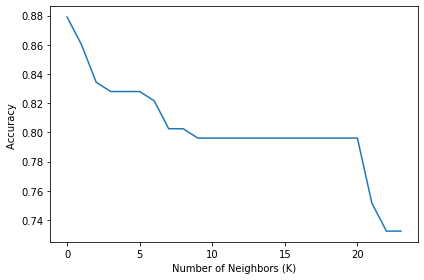

In [60]:
#Ploteo Accuracy vs k
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [61]:
#El mejor k es 6

### LOO out metricas

In [62]:
#Para LOO no hay y_test, utilizamos la Y
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
yhat=[]
xx=0
for train_index, test_index in loo.split(X): #EL for va a realizar 150 iteraciones porq es un total de 150 patrones
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #CLASIFICADOR 3NN
    clf = neighbors.KNeighborsClassifier(6)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)
print("Accuracy: ", accuracy_score(y,yhat))
print("Jaccard index: " , jaccard_score(y, yhat, average="macro"))
print("Precisión: ", precision_score(y, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y, yhat, average="macro"))
print("F1-score: ", f1_score(y,yhat, average="macro"))

Accuracy:  0.8089171974522293
Jaccard index:  0.5675300647548567
Precisión:  0.8051094890510949
Sensibilidad:  0.6730848861283644
F1-score:  0.6985407066052227


### LOO Confussion matrix

In [63]:
confusion_matrix(y, yhat, labels=[0,1])

array([[ 16,  26],
       [  4, 111]])

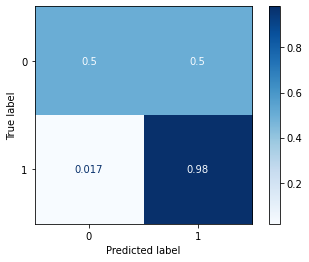

In [64]:
disp = plot_confusion_matrix(clf, X, y,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

### LOO Curva Roc

Area bajo la curva:  0.9042443064182194


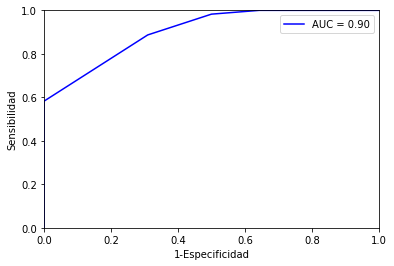

In [65]:
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

## 3. Cross validation

### Busco el mejor k para Cross Validation:

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

list_accuracy=[]
for i in range(3,50,2):
    clf = neighbors.KNeighborsClassifier(i)
    scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
    list_accuracy.append(scores.mean())
print(list_accuracy)

[0.8408333333333333, 0.8216666666666667, 0.8279166666666666, 0.8279166666666666, 0.8154166666666667, 0.8154166666666667, 0.8025, 0.79625, 0.79625, 0.79625, 0.79625, 0.79, 0.79625, 0.79625, 0.79625, 0.79625, 0.7837500000000001, 0.7770833333333333, 0.7641666666666667, 0.7325, 0.7325, 0.7325, 0.7325, 0.7325]


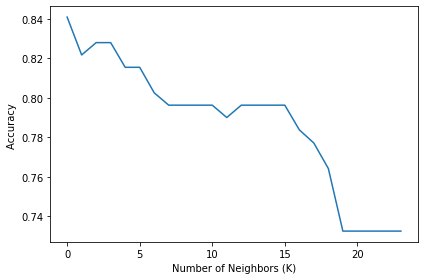

In [67]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [68]:
#

In [69]:
clf = neighbors.KNeighborsClassifier(3)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

[0.75       0.75       0.8125     0.875      0.8125     0.875
 1.         0.93333333 0.8        0.8       ]
**************************************************
Accuracy:  0.8408333333333333


### Cross Validation Metrics

In [70]:
clf = neighbors.KNeighborsClassifier(3)
scores_acc = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
scores_Jac = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(jaccard_score))
scores_prec = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(precision_score))
scores_sens = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(recall_score))
scores_f1=cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score))

#print(scores)
#print("*****"*10)
print("Accuracy_score: ", scores_acc.mean())
print("jaccard_score: ", scores_Jac.mean())
print("Precisión: ", scores_prec.mean())
print("Sensibilidad: ", scores_sens.mean())
print("F1-score: ", scores_f1.mean())


Accuracy_score:  0.8408333333333333
jaccard_score:  0.825
Precisión:  0.8304945054945054
Sensibilidad:  0.990909090909091
F1-score:  0.901994054254924


In [71]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

### Cross Validation Confussion matrix

In [72]:
confusion_matrix(ytest, yhat, labels=[0,1])

array([[  9,  33],
       [  0, 115]])

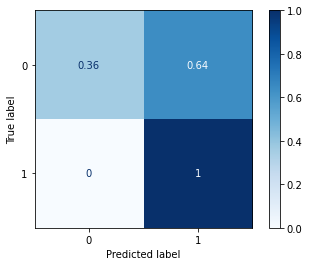

In [73]:
disp = plot_confusion_matrix(clf, xtrain, ytrain,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

### Cross Validation Curva Roc

Area bajo la curva:  0.8495859213250518


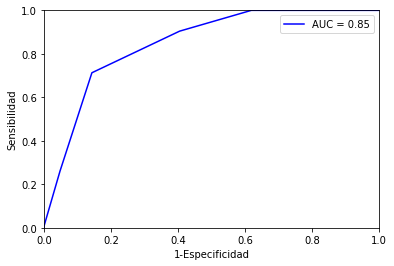

In [74]:
probs = clf.predict_proba(xtrain)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytrain, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

## clasificador euclidiano

### hold out

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (109, 20) (109,)
Test set: (48, 20) (48,)


In [76]:
clasificador = NearestCentroid()
clasificador.fit(X_train,y_train)
y_hat = clasificador.predict(X_test)
clasificador.score(X_test,y_test)

0.7083333333333334

In [77]:
print("Jaccard index: " , jaccard_score(y_test, yhat, average="macro"))
print("Exactitud: " , accuracy_score(y_test, yhat))
print("Precisión: ", precision_score(y_test, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test, yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))

ValueError: Found input variables with inconsistent numbers of samples: [48, 157]

### leave one out

In [78]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
ypred=[]
xx=0
for train_index, test_index in loo.split(X): #EL for va a realizar 150 iteraciones porq es un total de 150 patrones
    print(test_index) #Indice del patrón que se va a utilizar para la prueba
    print(train_index) #Indices de los patrones que se van a utilizar para el entrenamiento
    print(xx)
    xx+=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_test)
    
    
    # ANtes de esta linea todo es relacionado al Leave one out 
    
    #CLASIFICADOR nearest centoid
    
    clasificador = NearestCentroid()
    clasificador.fit(X_train,y_train)
    y_pred = clasificador.predict(X_test)
    ypred.append(y_pred)

#print(ypred)
print("Accuracy: ", accuracy_score(y,yhat))

[0]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
0
[[4.800e+01 7.000e+01 1.005e+00 4.000e+00 0.000e+00 1.170e+02 5.600e+01
  3.800e+00 1.110e+02 2.500e+00 1.120e+01 3.200e+01 6.700e+03 3.900e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00]]
[1]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  

[43]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
43
[[2.300e+01 8.000e+01 1.025e+00 0.000e+00 0.000e+00 7.000e+01 3.600e+01
  1.000e+00 1.500e+02 4.600e+00 1.700e+01 5.200e+01 9.800e+03 5.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]]
[44]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35

[[5.50e+01 8.00e+01 1.02e+00 0.00e+00 0.00e+00 1.04e+02 2.80e+01 9.00e-01
  1.42e+02 4.80e+00 1.73e+01 5.20e+01 8.20e+03 4.80e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00]]
[88]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
88
[[3.900e+01 7.000e+01 1.025e+00 0.000e+00 0.000e+00 1.310e+02 4.600e+01
  6.000e-01 1.450e+02 5.000e+00 1.560e+01 4.100e+01 9.400e+03 4.700e+00
  1.000e+00 0.000e+00 0.00

[[5.90e+01 6.00e+01 1.02e+00 0.00e+00 0.00e+00 1.13e+02 2.30e+01 1.10e+00
  1.39e+02 3.50e+00 1.53e+01 5.40e+01 6.50e+03 4.90e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00]]
[139]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
139
[[4.800e+01 8.000e+01 1.025e+00 0.000e+00 0.000e+00 7.500e+01 2.200e+01
  8.000e-01 1.370e+02 5.000e+00 1.680e+01 5.100e+01 6.000e+03 6.500e+00
  1.000e+00 0.000e+00 0.

In [81]:
print("Jaccard index: " , jaccard_score(y_test, yhat, average="macro"))
print("Exactitud: " , accuracy_score(y_test, yhat))
print("Precisión: ", precision_score(y_test, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test, yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))

ValueError: Found input variables with inconsistent numbers of samples: [1, 157]

## clasificador RadiusNN

### hold out

In [82]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clasificador = RadiusNeighborsClassifier(5000)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
accuracy_score(y_test, yhat)

ValueError: No neighbors found for test samples array([7]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

### leave one out

In [83]:
loo = LeaveOneOut()
ypred=[]
xx=0
for train_index, test_index in loo.split(X): #EL for va a realizar 150 iteraciones porq es un total de 150 patrones
    print(test_index) #Indice del patrón que se va a utilizar para la prueba
    print(train_index) #Indices de los patrones que se van a utilizar para el entrenamiento
    print(xx)
    xx+=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_test)
    
    
    # ANtes de esta linea todo es relacionado al Leave one out 
    
    
    
    clasificador = RadiusNeighborsClassifier(5000)
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    accuracy_score(y_test, yhat)

#print(ypred)
print("Accuracy: ", accuracy_score(y,yhat))

[0]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
0
[[4.800e+01 7.000e+01 1.005e+00 4.000e+00 0.000e+00 1.170e+02 5.600e+01
  3.800e+00 1.110e+02 2.500e+00 1.120e+01 3.200e+01 6.700e+03 3.900e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00]]
[1]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  

[[6.200e+01 7.000e+01 1.025e+00 3.000e+00 0.000e+00 1.220e+02 4.200e+01
  1.700e+00 1.360e+02 4.700e+00 1.260e+01 3.900e+01 7.900e+03 3.900e+00
  0.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00]]
[25]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
25
[[5.90e+01 8.00e+01 1.01e+00 1.00e+00 0.00e+00 3.03e+02 3.50e+01 1.30e+00
  1.22e+02 3.50e+00 1.04e+01 3.50e+01 1.09e+04 4.30e+00 1.00e+00 0.00e+00
  

ValueError: No neighbors found for test samples array([0]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

### cross validation

In [84]:
clf = RadiusNeighborsClassifier(5000)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

ValueError: No neighbors found for test samples array([2]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

## Logistic Regression

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (109, 20) (109,)
Test set: (48, 20) (48,)


In [86]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test, yhat)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [87]:
clf.coef_

array([[-0.27830528,  0.07859228, -0.00135853, -0.3337826 , -0.01476486,
        -0.34025089, -0.40914743, -0.1520868 ,  0.32109317, -0.04107664,
         0.24669618,  0.81637262, -0.00098207,  0.11317688,  0.0917395 ,
        -0.09608755, -0.09392876,  0.00588266, -0.011659  , -0.00371963]])

In [88]:
clf.intercept_

array([-0.00137049])

### Cross validation

In [91]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
scores = cross_val_score(clf1, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

[1.         1.         1.         1.         1.         0.9375
 1.         0.73333333 1.         1.        ]
**************************************************
Accuracy:  0.9670833333333334


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [105]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [97]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      0.952     1.000     0.976        40
           1      1.000     0.983     0.991       117

    accuracy                          0.987       157
   macro avg      0.976     0.991     0.983       157
weighted avg      0.988     0.987     0.987       157



In [98]:
clf.intercept_

array([-0.00600522])

In [99]:
clf.coef_

array([[-0.18925971,  0.03506483, -0.00602827, -0.44461725, -0.00178227,
        -0.21868619, -0.17323861, -0.1469394 ,  0.11554455, -0.07903045,
         0.32345181,  0.77212336, -0.00080707,  0.18127093,  0.12914106,
        -0.13616457, -0.13341745,  0.00175302, -0.0082145 , -0.00495007]])

In [100]:
clf.predict_proba(X_test)

array([[1.59021598e-08, 9.99999984e-01],
       [3.06635677e-07, 9.99999693e-01],
       [1.24344979e-14, 1.00000000e+00],
       [1.51107904e-09, 9.99999998e-01],
       [6.04674111e-09, 9.99999994e-01],
       [8.67108607e-11, 1.00000000e+00],
       [4.38715730e-12, 1.00000000e+00],
       [7.61544705e-04, 9.99238455e-01],
       [2.64054441e-08, 9.99999974e-01],
       [2.78448295e-02, 9.72155170e-01],
       [8.00309889e-04, 9.99199690e-01],
       [5.39568390e-14, 1.00000000e+00],
       [5.27577981e-13, 1.00000000e+00],
       [2.76211143e-09, 9.99999997e-01],
       [2.08699382e-08, 9.99999979e-01]])

In [106]:
confusion_matrix(ytest, yhat, labels=[0,1])

array([[ 40,   2],
       [  0, 115]])

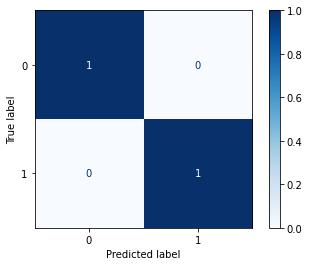

In [107]:
disp = plot_confusion_matrix(clf, xtrain, ytrain,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

## SVM

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

### Cross Validation

In [113]:
from sklearn.linear_model import LogisticRegression
clf = svm.SVC(kernel='linear',class_weight={0:1,1:1} ) 
scores = cross_val_score(clf1, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

[1.         1.         1.         1.         1.         0.9375
 1.         0.73333333 1.         1.        ]
**************************************************
Accuracy:  0.9670833333333334


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [115]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm.SVC(kernel='linear',class_weight={0:1,1:1} )
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [116]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      0.952     1.000     0.976        40
           1      1.000     0.983     0.991       117

    accuracy                          0.987       157
   macro avg      0.976     0.991     0.983       157
weighted avg      0.988     0.987     0.987       157

